In [ ]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#upload the dataset
data = pd.read_csv('/content/Week2_challenge_data_source.csv')

# Task 1

## Task 1.1

Aggregate per user the following information in the column 

1. Number of xDR sessions

In [ ]:
no_xDR_sessions= data['Bearer Id']
no_xDR_sessions.count()

5873

2. Session duration


In [ ]:
session_duration= data['Dur. (ms)']
session_duration.sum()

516160371

3. the total download (DL) and upload (UL) data


In [ ]:
data['Total UL (Bytes)'].sum()

240281432888.574

In [ ]:
data['Total DL (Bytes)'].sum()

2653741742910.257

4. Total Data Volume

In [ ]:
data['total_data_volume'] = data['Total UL (Bytes)'] + data['Total UL (Bytes)']

In [ ]:
data['total_data_volume'].sum()

480562865777.148

## Task 1.2

### Understanding my data

#### Data glance

In [ ]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_data_volume
0,1.311450e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.0,5.0,23,44,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,NaN
1,1.311450e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16,26,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,NaN
2,1.311450e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,NaN,NaN,6,9,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,NaN
3,1.311450e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,NaN,NaN,44,44,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,NaN
4,1.311450e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,NaN,NaN,6,9,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,NaN


In [ ]:
data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_data_volume
5888,1.311450e+19,4/24/2019 10:58,894,4/25/2019 0:44,519,49571,2.082010e+14,3.367686e+10,3.520450e+13,T72452C,34.0,6.0,47,51,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,9303.0,11670.0,49571625.0,Apple,Apple iPhone 6 Plus (A1524),NaN,NaN,NaN,NaN,NaN,NaN,80.0,85.0,791147.0,2173.0,6451636.0,1846465.0,505018.0,839180.0,20226186.0,2320330.0,11478319.0,2046675.0,71156962.0,2334812.0,86767665.0,279138.0,9668773.0,110609268.0,NaN
5889,7.277830e+18,4/24/2019 10:58,748,4/25/2019 5:12,36,65619,2.082010e+14,3.366241e+10,3.519180e+13,T78410C,35.0,6.0,287,88,3710.0,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,5238.0,5076.0,65619288.0,Samsung,Samsung Galaxy A6 (Sm-A605Fn),NaN,NaN,NaN,NaN,NaN,NaN,71.0,38.0,252228.0,22281.0,6330171.0,3882407.0,615918.0,705284.0,16306950.0,13176574.0,10671137.0,5474960.0,365735804.0,4930825.0,75477400.0,6666484.0,34858815.0,399912208.0,NaN
5890,1.304240e+19,4/24/2019 10:58,364,4/25/2019 1:26,482,52102,2.082010e+14,3.366078e+10,3.591420e+13,D11113A,34.0,3.0,21489,613,42744.0,NaN,72.0,17.0,8.0,1.0,99.0,0.0,0.0,0.0,2518288.0,198938.0,983714.0,1285217.0,52102118.0,Apple,Apple iPhone Se (A1723),34.0,6.0,179.0,NaN,391.0,NaN,1618.0,2245.0,2298778.0,43714.0,8321911.0,2203566.0,2476752.0,567414.0,7383468.0,16850273.0,992126.0,16911027.0,693402641.0,10921069.0,425992164.0,10939210.0,58436273.0,714875676.0,2717226.0
5891,1.311450e+19,4/24/2019 10:58,126,4/25/2019 1:04,882,50736,2.082000e+14,3.366537e+10,3.552120e+13,D88804C,NaN,NaN,23,42,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,6955.0,11831.0,50736756.0,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,33.0,55.0,441573.0,53139.0,2800696.0,583141.0,1851500.0,591028.0,14952937.0,22145.0,20387842.0,10682280.0,84630389.0,4188763.0,232675075.0,2207932.0,18328428.0,125064937.0,NaN
5892,1.311450e+19,4/24/2019 10:58,331,4/25/2019 0:00,572,46889,2.082020e+14,3.361638e+10,3.569780e+13,T40374B,35.0,5.0,44,48,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploring data 

#### data features

In [ ]:
# check dimension of dataset
data.shape

(5893, 56)

In [ ]:
#check the total elements in dataset
data.size

330008

In [ ]:
# data types of each column in dataset
data_types = pd.DataFrame(data.dtypes,
                          columns=['Data Type'])
data_types

,Data Type
Bearer Id,float64
Start,object
Start ms,int64
End,object
End ms,int64
Dur. (ms),int64
IMSI,float64
MSISDN/Number,float64
IMEI,float64
Last Location Name,object


In [ ]:
# summary of dataset

summary = data.info()
          
summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 5873 non-null   float64
 1   Start                                     5893 non-null   object 
 2   Start ms                                  5893 non-null   int64  
 3   End                                       5893 non-null   object 
 4   End ms                                    5893 non-null   int64  
 5   Dur. (ms)                                 5893 non-null   int64  
 6   IMSI                                      5877 non-null   float64
 7   MSISDN/Number                             5863 non-null   float64
 8   IMEI                                      5877 non-null   float64
 9   Last Location Name                        5873 non-null   object 
 10  Avg RTT DL (ms)                     

#### Statical summary

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bearer Id,5873.0,1.047215e+19,2.887665e+18,6.917540e+18,7.277830e+18,1.304240e+19,1.304240e+19,1.318650e+19
Start ms,5893.0,4.979158e+02,2.874105e+02,0.000000e+00,2.510000e+02,4.990000e+02,7.460000e+02,9.990000e+02
End ms,5893.0,4.998804e+02,2.890231e+02,0.000000e+00,2.490000e+02,5.030000e+02,7.500000e+02,9.990000e+02
Dur. (ms),5893.0,8.758873e+04,7.418936e+04,4.393400e+04,6.240700e+04,8.639900e+04,8.639900e+04,1.823652e+06
IMSI,5877.0,2.082017e+14,1.358086e+09,2.082000e+14,2.082010e+14,2.082020e+14,2.082020e+14,2.082100e+14
MSISDN/Number,5863.0,3.367673e+10,4.330031e+07,3.360115e+10,3.365875e+10,3.366433e+10,3.368187e+10,3.378991e+10
IMEI,5877.0,5.882906e+13,2.558838e+13,1.264600e+12,3.554340e+13,3.592570e+13,8.637690e+13,9.900120e+13
Avg RTT DL (ms),5397.0,1.138612e+02,4.996303e+02,1.200000e+01,3.800000e+01,5.500000e+01,8.800000e+01,2.587300e+04
Avg RTT UL (ms),5399.0,2.407446e+01,9.008315e+01,0.000000e+00,5.000000e+00,1.200000e+01,2.800000e+01,5.279000e+03
Avg Bearer TP DL (kbps),5893.0,2.535146e+04,2.904945e+04,0.000000e+00,6.100000e+01,1.827600e+04,4.092200e+04,2.172470e+05


#### Data quality features

##### Unique Values

In [ ]:
# unique values in dataset
unique_values = pd.DataFrame(columns=['Unique Values'])
for x in list(data.columns.values):
    unique_values.loc[x] = [data[x].nunique()]
unique_values

,Unique Values
Bearer Id,8
Start,1087
Start ms,999
End,420
End ms,996
Dur. (ms),2919
IMSI,4
MSISDN/Number,5196
IMEI,1136
Last Location Name,4493


In [ ]:
sorted_unique_values = unique_values.sort_values(by='Unique Values', ascending=True)
sorted_unique_values

,Unique Values
IMSI,4
Bearer Id,8
UL TP > 300 Kbps (%),24
50 Kbps < UL TP < 300 Kbps (%),27
10 Kbps < UL TP < 50 Kbps (%),45
250 Kbps < DL TP < 1 Mbps (%),46
Handset Manufacturer,52
50 Kbps < DL TP < 250 Kbps (%),55
UL TP < 10 Kbps (%),58
DL TP > 1 Mbps (%),58


##### Missing values

In [ ]:
missing_data_counts = pd.DataFrame(data.isnull().sum(),
                                   columns=(['Missing Values']))
missing_data_counts

,Missing Values
Bearer Id,20
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
IMSI,16
MSISDN/Number,30
IMEI,16
Last Location Name,20


In [ ]:
missing_data_counts_sorted = missing_data_counts.sort_values(by='Missing Values', ascending=True)
missing_data_counts_sorted

,Missing Values
Start,0
Start ms,0
End,0
End ms,0
Dur. (ms),0
Avg Bearer TP UL (kbps),0
Avg Bearer TP DL (kbps),0
Activity Duration UL (ms),1
Email DL (Bytes),1
Google UL (Bytes),1


#### Data cleaning


In [ ]:
# replacing all the null values with the mean
data = data.fillna(data.mean())
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_data_volume
0,1.311450e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,42.000000,5.000000,23,44,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,3.762400e+04,3.878700e+04,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,213.00000,214.000000,1.545765e+06,24420.000000,1.634479e+06,1.271433e+06,3.563542e+06,137762.000000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,1.892463e+08
1,1.311450e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.000000,5.000000,16,26,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,1.680000e+02,3.560000e+03,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,971.00000,1022.000000,1.926113e+06,7165.000000,3.493924e+06,9.201720e+05,6.290460e+05,308339.000000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,1.892463e+08
2,1.311450e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,113.861219,24.074458,6,9,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,0.000000e+00,0.000000e+00,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,751.00000,695.000000,1.684053e+06,42224.000000,8.535055e+06,1.694064e+06,2.690151e+06,672973.000000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,1.892463e+08
3,1.311450e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,113.861219,24.074458,44,44,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,3.330000e+03,3.788200e+04,1.321510e+09,undefined,undefined,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,17.00000,207.000000,6.441210e+05,13372.000000,9.023734e+06,2.788027e+06,1.439754e+06,631229.000000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,1.892463e+08
4,1.311450e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,113.861219,24.074458,6,9,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,0.000000e+00,0.000000e+00,1.089

In [ ]:
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 -Q1
IQR

Bearer Id                                   5.764570e+18
Start ms                                    4.950000e+02
End ms                                      5.010000e+02
Dur. (ms)                                   2.399200e+04
IMSI                                        1.000000e+09
MSISDN/Number                               2.255913e+07
IMEI                                        5.083310e+13
Avg RTT DL (ms)                             7.100000e+01
Avg RTT UL (ms)                             2.100000e+01
Avg Bearer TP DL (kbps)                     4.086100e+04
Avg Bearer TP UL (kbps)                     3.473000e+03
TCP DL Retrans. Vol (Bytes)                 3.044627e+07
TCP UL Retrans. Vol (Bytes)                 1.260160e+06
DL TP < 50 Kbps (%)                         2.000000e+01
50 Kbps < DL TP < 250 Kbps (%)              7.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               4.000000e+00
DL TP > 1 Mbps (%)                          3.296966e+00
UL TP < 10 Kbps (%)            

In [ ]:
lower_bound = Q1 -(1.5 * IQR)
lower_bound

Bearer Id                                  -1.369025e+18
Start ms                                   -4.915000e+02
End ms                                     -5.025000e+02
Dur. (ms)                                   2.641900e+04
IMSI                                        2.081995e+14
MSISDN/Number                               3.362493e+10
IMEI                                       -4.070585e+13
Avg RTT DL (ms)                            -6.650000e+01
Avg RTT UL (ms)                            -2.650000e+01
Avg Bearer TP DL (kbps)                    -6.123050e+04
Avg Bearer TP UL (kbps)                    -5.153500e+03
TCP DL Retrans. Vol (Bytes)                -4.516107e+07
TCP UL Retrans. Vol (Bytes)                -1.867521e+06
DL TP < 50 Kbps (%)                         5.000000e+01
50 Kbps < DL TP < 250 Kbps (%)             -1.050000e+01
250 Kbps < DL TP < 1 Mbps (%)              -6.000000e+00
DL TP > 1 Mbps (%)                         -4.945448e+00
UL TP < 10 Kbps (%)            

In [ ]:
upper_bound = Q3 +(1.5 * IQR)
upper_bound

Bearer Id                                   2.168926e+19
Start ms                                    1.488500e+03
End ms                                      1.501500e+03
Dur. (ms)                                   1.223870e+05
IMSI                                        2.082035e+14
MSISDN/Number                               3.371517e+10
IMEI                                        1.626266e+14
Avg RTT DL (ms)                             2.175000e+02
Avg RTT UL (ms)                             5.750000e+01
Avg Bearer TP DL (kbps)                     1.022135e+05
Avg Bearer TP UL (kbps)                     8.738500e+03
TCP DL Retrans. Vol (Bytes)                 7.662401e+07
TCP UL Retrans. Vol (Bytes)                 3.173117e+06
DL TP < 50 Kbps (%)                         1.300000e+02
50 Kbps < DL TP < 250 Kbps (%)              1.750000e+01
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+01
DL TP > 1 Mbps (%)                          8.242414e+00
UL TP < 10 Kbps (%)            

In [ ]:
(data < (lower_bound))

,10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),Bearer Id,DL TP < 50 Kbps (%),DL TP > 1 Mbps (%),Dur. (ms),Dur. (ms).1,Email DL (Bytes),Email UL (Bytes),End,End ms,Gaming DL (Bytes),Gaming UL (Bytes),Google DL (Bytes),Google UL (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Handset Manufacturer,Handset Type,IMEI,IMSI,Last Location Name,MSISDN/Number,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Netflix DL (Bytes),Netflix UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Start,Start ms,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Total DL (Bytes),Total UL (Bytes),UL TP < 10 Kbps (%),UL TP > 300 Kbps (%),Youtube DL (Bytes),Youtube UL (Bytes),total_data_volume
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
(data > (upper_bound))

,10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),Bearer Id,DL TP < 50 Kbps (%),DL TP > 1 Mbps (%),Dur. (ms),Dur. (ms).1,Email DL (Bytes),Email UL (Bytes),End,End ms,Gaming DL (Bytes),Gaming UL (Bytes),Google DL (Bytes),Google UL (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Handset Manufacturer,Handset Type,IMEI,IMSI,Last Location Name,MSISDN/Number,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Netflix DL (Bytes),Netflix UL (Bytes),Other DL (Bytes),Other UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Start,Start ms,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Total DL (Bytes),Total UL (Bytes),UL TP < 10 Kbps (%),UL TP > 300 Kbps (%),Youtube DL (Bytes),Youtube UL (Bytes),total_data_volume
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

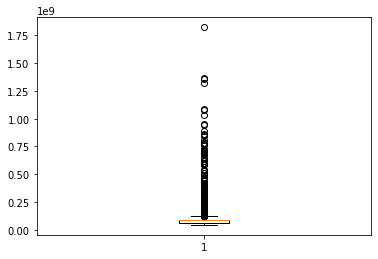

In [ ]:
plt.boxplot(data["Dur. (ms).1"])
plt.show()

#### Non graphical univariate analysis


In [ ]:
# create frequency table for categorical variables
handset_type = data['Handset Type']
handset_count = handset_type.value_counts().reset_index(name ='count')
handset_count

,index,count
0,Huawei B528S-23A,1974
1,Apple iPhone 6 (A1586),288
2,Apple iPhone 6S (A1688),258
3,undefined,231
4,Huawei E5180,200
...,...,...
313,Sierra Wireless Hl6528Rd-2.8V,1
314,Wiko Global Sasu Wiko Tommy2,1
315,Sony Mobile Comm. Xperia T3,1
316,D-Link Corporati. D-Link Dwr-921,1


In [ ]:
handset_man = data['Handset Manufacturer']
handset_man_count = handset_man.value_counts().reset_index(name ='count')
handset_man_count

,index,count
0,Huawei,2563
1,Apple,1789
2,Samsung,1048
3,undefined,231
4,Wiko Global Sasu,45
5,Zte,33
6,Sony Mobile Communications Ab,16
7,Asustek,11
8,TP-Link Technologies Co Ltd,10
9,Nokia,10


In [ ]:
handset_data = pd.DataFrame(data,columns=['Handset Manufacturer','Handset Type'])
handset_data

,Handset Manufacturer,Handset Type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
3,undefined,undefined
4,Samsung,Samsung Sm-G390F
...,...,...
5888,Apple,Apple iPhone 6 Plus (A1524)
5889,Samsung,Samsung Galaxy A6 (Sm-A605Fn)
5890,Apple,Apple iPhone Se (A1723)
5891,Samsung,Samsung Galaxy A5 Sm-A520F


In [ ]:
#list non numeric variables
df_non_numeric = df.select_dtypes(exclude='number')

df_non_numeric.dropna()


,Start,End,Last Location Name,Handset Manufacturer,Handset Type
0,4/4/2019 12:01,4/25/2019 14:35,9.16457E+15,Samsung,Samsung Galaxy A5 Sm-A520F
1,4/9/2019 13:04,4/25/2019 8:15,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,4/9/2019 17:42,4/25/2019 11:58,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,4/10/2019 0:31,4/25/2019 7:36,T21824A,undefined,undefined
4,4/12/2019 20:10,4/25/2019 10:40,D88865A,Samsung,Samsung Sm-G390F
...,...,...,...,...,...
5887,4/24/2019 10:57,4/25/2019 0:01,D73531C,Samsung,Samsung Galaxy S8 Plus (Sm-G955F)
5888,4/24/2019 10:58,4/25/2019 0:44,T72452C,Apple,Apple iPhone 6 Plus (A1524)
5889,4/24/2019 10:58,4/25/2019 5:12,T78410C,Samsung,Samsung Galaxy A6 (Sm-A605Fn)
5890,4/24/2019 10:58,4/25/2019 1:26,D11113A,Apple,Apple iPhone Se (A1723)


In [ ]:
# list the numeric columns
data_numeric = data.select_dtypes(include='number')

data_numeric

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_data_volume
0,1.311450e+19,770,662,1823652,2.082010e+14,3.366496e+10,3.552120e+13,42.000000,5.000000,23,44,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,3.762400e+04,3.878700e+04,1.823653e+09,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,213.00000,214.000000,1.545765e+06,24420.000000,1.634479e+06,1.271433e+06,3.563542e+06,137762.000000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,7.349948e+07
1,1.311450e+19,235,606,1365104,2.082020e+14,3.368185e+10,3.579400e+13,65.000000,5.000000,16,26,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,1.680000e+02,3.560000e+03,1.365104e+09,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,971.00000,1022.000000,1.926113e+06,7165.000000,3.493924e+06,9.201720e+05,6.290460e+05,308339.000000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,1.076008e+08
2,1.311450e+19,1,652,1361762,2.082000e+14,3.376063e+10,3.528150e+13,113.861219,24.074458,6,9,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,0.000000e+00,0.000000e+00,1.361763e+09,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,751.00000,695.000000,1.684053e+06,42224.000000,8.535055e+06,1.694064e+06,2.690151e+06,672973.000000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,5.576728e+07
3,1.311450e+19,486,171,1321509,2.082010e+14,3.375034e+10,3.535660e+13,113.861219,24.074458,44,44,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,3.330000e+03,3.788200e+04,1.321510e+09,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,17.00000,207.000000,6.441210e+05,13372.000000,9.023734e+06,2.788027e+06,1.439754e+06,631229.000000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,8.664844e+07
4,1.311450e+19,565,954,1089009,2.082010e+14,3.369980e+10,3.540700e+13,113.861219,24.074458,6,9,3.095461e+07,1.282878e+06,100.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.816081e+08,5.124702e+06,0.000000e+00,0.000000e+00,1.089009e+09,1472.942519,466.915814,1156.067571,221.352792,1360.397933,153.590232,607.00000,604.000000,8.626000e+05,50188.000000,6.248284e+06,1.500559e+06,1.936496e+06,173853.000000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,7.708563e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
data.var()

Bearer Id                                   8.310306e+36
Start ms                                    8.260481e+04
End ms                                      8.353433e+04
Dur. (ms)                                   5.504062e+09
IMSI                                        1.839390e+18
MSISDN/Number                               1.865370e+15
IMEI                                        6.529872e+26
Avg RTT DL (ms)                             2.286161e+05
Avg RTT UL (ms)                             7.434594e+03
Avg Bearer TP DL (kbps)                     8.438703e+08
Avg Bearer TP UL (kbps)                     3.611897e+07
TCP DL Retrans. Vol (Bytes)                 3.254129e+16
TCP UL Retrans. Vol (Bytes)                 9.258840e+14
DL TP < 50 Kbps (%)                         2.393016e+02
50 Kbps < DL TP < 250 Kbps (%)              4.753945e+01
250 Kbps < DL TP < 1 Mbps (%)               2.678182e+01
DL TP > 1 Mbps (%)                          4.796821e+01
UL TP < 10 Kbps (%)            

In [ ]:
data.std()

Bearer Id                                   2.882760e+18
Start ms                                    2.874105e+02
End ms                                      2.890231e+02
Dur. (ms)                                   7.418936e+04
IMSI                                        1.356241e+09
MSISDN/Number                               4.318993e+07
IMEI                                        2.555361e+13
Avg RTT DL (ms)                             4.781382e+02
Avg RTT UL (ms)                             8.622409e+01
Avg Bearer TP DL (kbps)                     2.904945e+04
Avg Bearer TP UL (kbps)                     6.009906e+03
TCP DL Retrans. Vol (Bytes)                 1.803920e+08
TCP UL Retrans. Vol (Bytes)                 3.042834e+07
DL TP < 50 Kbps (%)                         1.546938e+01
50 Kbps < DL TP < 250 Kbps (%)              6.894886e+00
250 Kbps < DL TP < 1 Mbps (%)               5.175115e+00
DL TP > 1 Mbps (%)                          6.925909e+00
UL TP < 10 Kbps (%)            

In [ ]:
data.quantile([0.1,0.2,0.25,0.30,0.40,0.5,0.75,0.95]).transpose()

,0.10,0.20,0.25,0.30,0.40,0.50,0.75,0.95
Bearer Id,7.277830e+18,7.277830e+18,7.277830e+18,7.277830e+18,7.349880e+18,1.304240e+19,1.304240e+19,1.311450e+19
Start ms,9.800000e+01,2.000000e+02,2.510000e+02,2.980000e+02,4.008000e+02,4.990000e+02,7.460000e+02,9.484000e+02
End ms,1.020000e+02,2.020000e+02,2.490000e+02,2.920000e+02,4.000000e+02,5.030000e+02,7.500000e+02,9.464000e+02
Dur. (ms),5.446400e+04,5.976800e+04,6.240700e+04,6.635200e+04,8.555480e+04,8.639900e+04,8.639900e+04,1.262288e+05
IMSI,2.082010e+14,2.082010e+14,2.082010e+14,2.082010e+14,2.082020e+14,2.082020e+14,2.082020e+14,2.082020e+14
MSISDN/Number,3.363016e+10,3.365187e+10,3.365877e+10,3.365957e+10,3.366187e+10,3.366440e+10,3.368133e+10,3.376374e+10
IMEI,3.533192e+13,3.550496e+13,3.554380e+13,3.561416e+13,3.573650e+13,3.592670e+13,8.637690e+13,8.655450e+13
Avg RTT DL (ms),2.800000e+01,3.600000e+01,4.000000e+01,4.300000e+01,5.000000e+01,5.900000e+01,1.110000e+02,2.740000e+02
Avg RTT UL (ms),2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,9.000000e+00,1.500000e+01,2.600000e+01,6.300000e+01
Avg Bearer TP DL (kbps),3.600000e+01,4.900000e+01,6.100000e+01,2.566000e+02,7.411800e+03,1.827600e+04,4.092200e+04,8.024300e+04


#### Graphical univariate analysis

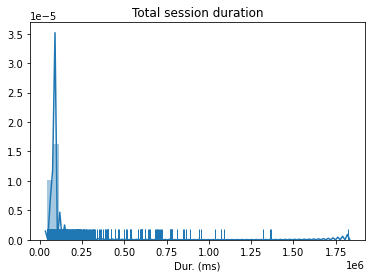

In [261]:
sns.distplot(data_numeric['Dur. (ms)'], bins=50, kde=True, rug=True)
plt.title('Total session duration')
plt.show()

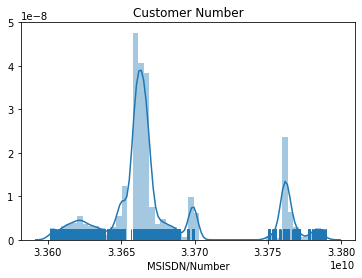

In [260]:
sns.distplot(data_numeric['MSISDN/Number'], bins=50, kde=True, rug=True)
plt.title('Customer Number')
plt.show()

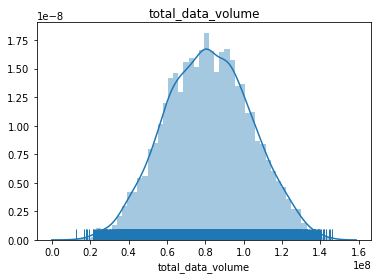

In [275]:
sns.distplot(data['total_data_volume'], bins=50, kde=True, rug=True)
plt.title('total_data_volume')
plt.show()


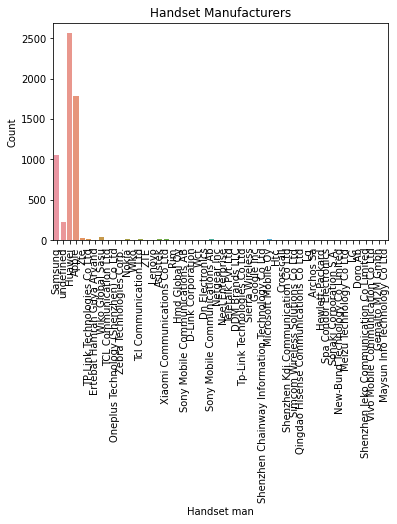

In [264]:

sns.countplot(x="Handset Manufacturer",
            data=df_non_numeric)
plt.title('Handset Manufacturers')
plt.ylabel('Count')
plt.xlabel('Handset man')
plt.xticks(rotation=90)
plt.show()

#### Bivariate Analysis

In [ ]:
data['Social Media'] = data['Social Media DL (Bytes)'] + data['Social Media UL (Bytes)']
data['Youtube'] = data['Youtube UL (Bytes)'] + data['Youtube DL (Bytes)']
data['Email'] = data['Email UL (Bytes)'] + data['Email DL (Bytes)']
data['Netflix'] = data['Netflix DL (Bytes)'] + data['Netflix UL (Bytes)']
data['Google'] = data['Google DL (Bytes)'] + data['Google UL (Bytes)']
data['Gaming'] = data['Gaming DL (Bytes)'] + data['Gaming UL (Bytes)']
data['Other'] = data['Other DL (Bytes)'] + data['Other UL (Bytes)']
data['Total_data_volume'] = data['Total UL (Bytes)'] + data['Total UL (Bytes)']

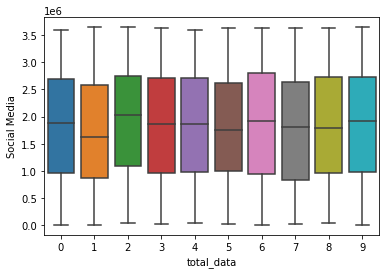

In [268]:

sns.boxplot(y ='Social Media',x='total_data',data=data)
plt.show()

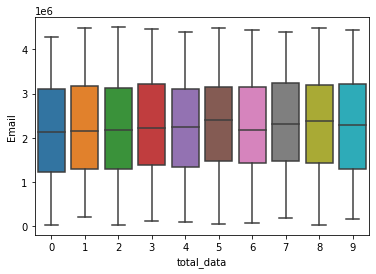

In [270]:
sns.boxplot(y='Email',x='total_data',data=data)
plt.show()

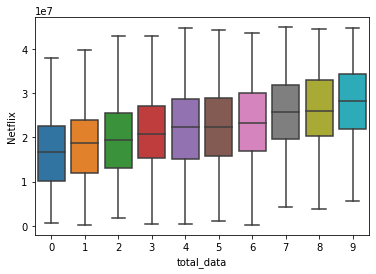

In [271]:
sns.boxplot(y='Netflix',x='total_data',data=data)
plt.show()

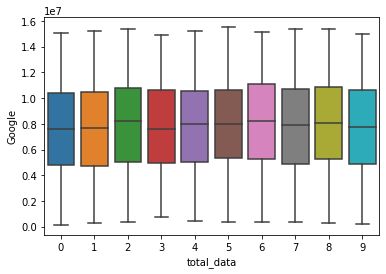

In [272]:
sns.boxplot(y='Google',x='total_data',data=data)
plt.show()

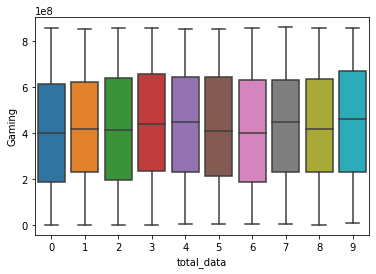

In [273]:
sns.boxplot(y='Gaming',x='total_data',data=data)
plt.show()

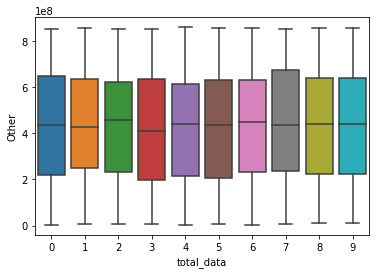

In [274]:
sns.boxplot(y='Other',x='total_data',data=data)
plt.show()

#### Variable transfromation

In [ ]:
# total session duration
data['total duration']=data['Dur. (ms).1'].sum()
data['total duration'].head()



0    5.162047e+11
1    5.162047e+11
2    5.162047e+11
3    5.162047e+11
4    5.162047e+11
Name: total duration, dtype: float64

In [ ]:
# deciles
data['total duration'] = pd.qcut(data['total duration'],10,labels=False,duplicates='drop')
data['total duration'].sort_values(ascending=False).head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: total duration, dtype: float64

In [ ]:
# decile of total data
data['total_data'] = pd.qcut(data['Total_data_volume'],10,labels=False,duplicates='drop')
data['total_data'].sort_values(ascending=False).head(5)

4566    9
2092    9
698     9
2069    9
5329    9
Name: total_data, dtype: int64

In [ ]:
user_seg = pd.DataFrame(data, columns = ['total duration', 'total_data' ])
user_seg.sort_values(by=['total_data'],ascending = False).head(5)
#print pd.crosstab(user_seg.(data['total_data'].sort_values(ascending=False).head(5)), df.SEX, margins=True)

,total duration,total_data
1087,5.162047e+11,9
2941,5.162047e+11,9
507,5.162047e+11,9
3906,5.162047e+11,9
1028,5.162047e+11,9


#### Correlation Analysis

In [278]:
# creating a dataframe to store values for application data
import pandas as pd
app_data = pd.DataFrame(data,columns=['Social Media','Youtube','Email','Netflix','Google','Gaming','Other'])

In [ ]:
corr_matrix = app_data.corr()

,Social Media,Youtube,Email,Netflix,Google,Gaming,Other
Social Media,1.000000,-0.001315,0.023740,-0.018085,-0.007553,-0.014660,0.005224
Youtube,-0.001315,1.000000,0.001177,-0.019300,0.002086,0.008094,-0.002358
Email,0.023740,0.001177,1.000000,0.013729,-0.005452,-0.006369,-0.021421
Netflix,-0.018085,-0.019300,0.013729,1.000000,-0.000305,0.002850,-0.026470
Google,-0.007553,0.002086,-0.005452,-0.000305,1.000000,-0.012386,0.004915
Gaming,-0.014660,0.008094,-0.006369,0.002850,-0.012386,1.000000,-0.001038
Other,0.005224,-0.002358,-0.021421,-0.026470,0.004915,-0.001038,1.000000


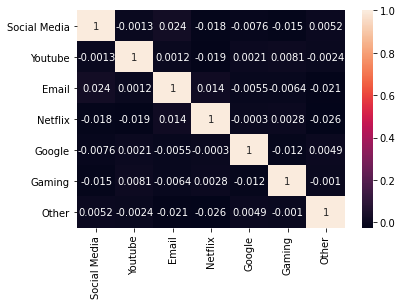

In [ ]:
corr_matrix = app_data.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

#### Dimensionality reduction(PCA)